# Numerical exercise
Kristine Schüller and Sigrid Aunsmo

# sjekk valg av delta_t i senere oppgaver med ulik V_max 

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt 

#for animasjon
import matplotlib.animation as animation
#%matplotlib notebook #bruke denne ved animasjon?
#%matplotlib inline


#defining constants which will be the same in all problems 
h_bar=1
m=1
k_0=20
L=20

#plotting parameters 
fontsize=15
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (20, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}

plt.rcParams.update(newparams)

## problem 1

To be able to study the propagation of a wave packet we first need to find the inital wave function. This is done by using Eq 8 from the exercise sheet: 

$\Psi(x,t) = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } e^{i(k_0x-\omega t)},$

where C is just a normalization constant such that 

$
\int_0^L |\Psi(x,t)|^2 dx = 1
$

In the numerical propagation of the wave packet we want to split $\Psi$ into a real and an imaginary part.  

$
\Psi_I = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } \sin(k_0 x-\omega t)
$

$
\Psi_R = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } \cos(k_0 x-\omega t)
$

To normalize $\Psi$ we use that $|\Psi|^2=\Psi_I^2+Psi_R^2$. We also know that $|\Psi_I|^2=|\Psi_R|^2$. This means that $|\Psi_I|^2=|\Psi_R|^2=\frac{1}{2}$. 



If we exclude $C$ at first and caluculate the real and imaginary parts of the wave function we can then normalize $\Psi_I$ and $\Psi_R$ just by dividing by its own norm times $\sqrt{2}$.


In the propagation we find $\Psi_R(x,(n+1/2)\Delta t)$ and $\Psi_I(x,n*\Delta t)$ at the n-th timestep. Because of this we want our inital functions to be $\Psi_I(x,0)$ and $\Psi_R(x, \frac{ \Delta t}{2} )$. 


# Skriv noe om valg av delta t

The choice of $\Delta t$ is discussed in problem 2. 


# Skriv noe om energi og omega


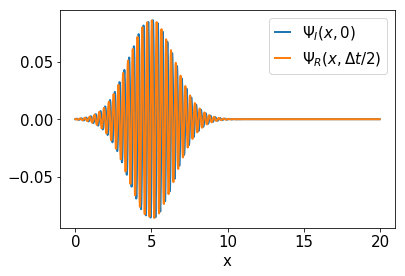

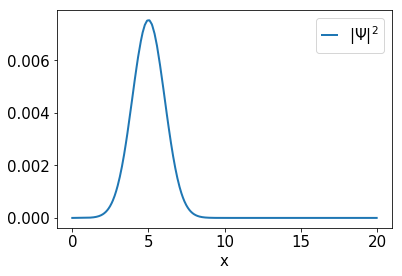

Check that psi is normalized 0.9999999999999996
EnergY:  200.0
Delta x: 0.02


In [2]:
%matplotlib inline

sigma_x=1.5 #??
xs=5 #bare satte 5 fordi vi skal ha den verdien etterhvert
Nx= 1000

#finding E and omega based on forumula in text
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar


#Function to calculate imaginary part of psi
def find_psi_im(x,t,sigma_x):
    psi_i=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_i[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.sin(k_0*x[1:-1]-omega*t)
    psi_i=psi_i/np.linalg.norm(psi_i)/np.sqrt(2) #normalizing
    return psi_i

#function to calculate real part of psi 
def find_psi_re(x,t,sigma_x):
    psi_r=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_r[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.cos(k_0*x[1:-1]-omega*t)
    psi_r=psi_r/np.linalg.norm(psi_r)/np.sqrt(2) #normalizing
    return psi_r
    
#guessing a value for delta_t 
delta_t=0.00001

#defining delta_x 
"""stemmer dette? Er lengda på arrayene Nx+1??"""
delta_x= L/(Nx)    

#making a array of x-values from 0 to L
x=np.arange(0,L,delta_x)

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i=find_psi_im(x,0,sigma_x)
psi_r=find_psi_re(x,delta_t/2,sigma_x)


#plotting
plt.title('')
plt.plot(x,psi_i,label=r'$\Psi_I(x,0)$')
plt.plot(x,psi_r,label=r'$\Psi_R(x,\Delta t /2)$')
plt.legend()
plt.xlabel('x')
plt.show()

"""ettersom vi har så liten delta_t, kanskje vi kan bruke de psi-ene vi har funnet????"""
psi_squared=psi_i**2+psi_r**2 
plt.plot(x,psi_squared,label=r'$|\Psi|^2$')
plt.xlabel('x')
plt.legend()
plt.show()

"""testet at den faktisk er normalisert"""
print("Check that psi is normalized",np.sum(psi_squared))
print("EnergY: ", E)
print("Delta x:", delta_x )


The number of x-values, Nx, was set to 1000. This value gives a smooth plot for $\Psi_I$ and $\Psi_R$, as well as for the probability density. The time difference between the plots of $\Psi_I$ and $\Psi_R$ is so small that it is practically insignificant. The wave packet has a gaussian shape located around $x_s$, which value was set equal to 5. The value of sigma_x, which determines the spread of the plot, was set equal to 1.5.







## problem 2
Now we want to study the propagation of the wave packet. 
The Scödringer Equation reads



From the Schödringer equation it can be derived a numerical propagation method. 

$
\Psi_I(x,t+\Delta t)= \Psi_I(x,t)-\Delta t \Big [ V(x)\Psi_R(x,t) -\frac{\hbar^2}{2m} \frac{\Psi_R(x,t-\frac{\Delta t)}{2}-2\Psi_R(x,t)+\Psi_R(x,t+\frac{\Delta t}{2})}{(\Delta x)^2}   \Big ]
$

and 

$
\Psi_R(x,t+\Delta t/2)= \Psi_R(x,t)+\Delta t \Big [ V(x)\Psi_I(x,t) -\frac{\hbar^2}{2m} \frac{\Psi_I(x,t-\Delta t)-2\Psi_I(x,t)+\Psi_I(x,t+\Delta t)}{(\Delta x)^2}   \Big ]
$



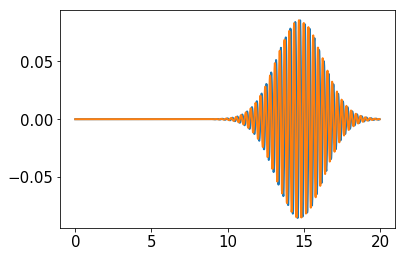

'Det ser ikke ut som den blir helt 15???'

In [3]:
%matplotlib inline

v_g=(h_bar*k_0)/m
T= L/(2*v_g)
timesteps=int(T/delta_t) #number of steps in the iteration 

#setting the potensial to be zero 
V2=np.zeros(len(x)) 

#finding the inital values for psi_i and psi_r
psi_i=find_psi_im(x,0,sigma_x)
psi_r=find_psi_re(x,delta_t/2,sigma_x)

#functions to update psi_r and psi_i
def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_i=np.zeros(len(psi_i))
    nextPsi_i[1:-1] = psi_i[1:-1] - delta_t *(V[1:-1]/h_bar*psi_r[1:-1] - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    return nextPsi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    nextPsi_r[1:-1] = psi_r[1:-1] + delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    return nextPsi_r
    


"""Kanskje se litt på å ta inn array by referance ikke copy??"""
def propagate_psi(psi_i,psi_r,timesteps,V):
    for i in range(timesteps):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t, V)
    return psi_i, psi_r


#run propagation
psi_i, psi_r = propagate_psi(psi_i,psi_r,timesteps,V2)
    
    
#plotting 
plt.plot(x,psi_i)
plt.plot(x,psi_r)
plt.show()

"""Det ser ikke ut som den blir helt 15???"""


49999
('sigma_x =', 0.5)


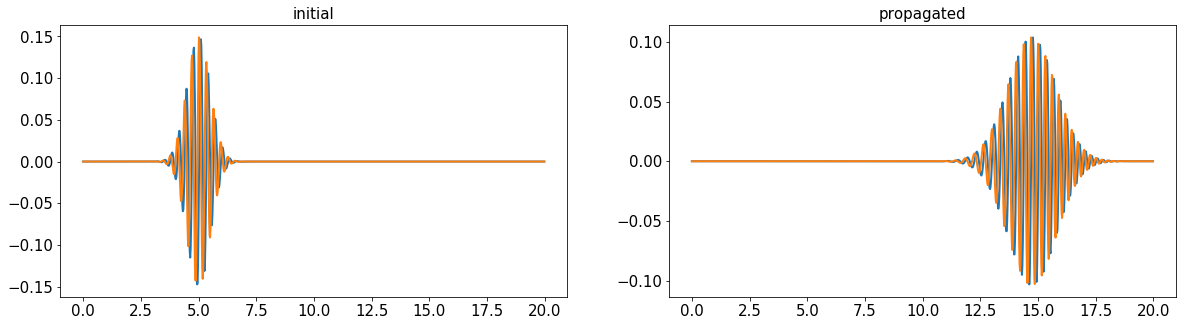

('sigma_x =', 1)


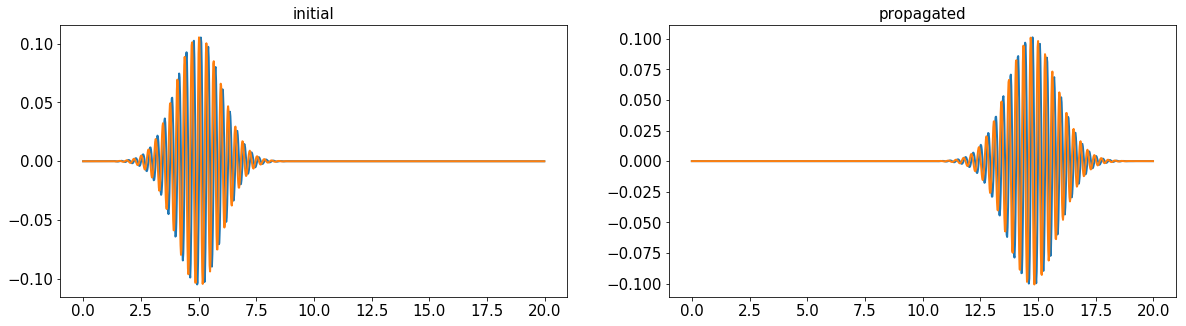

('sigma_x =', 2)


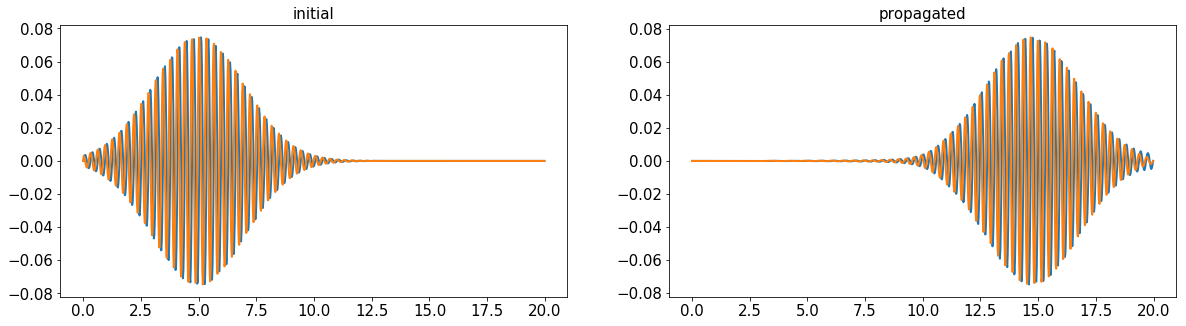

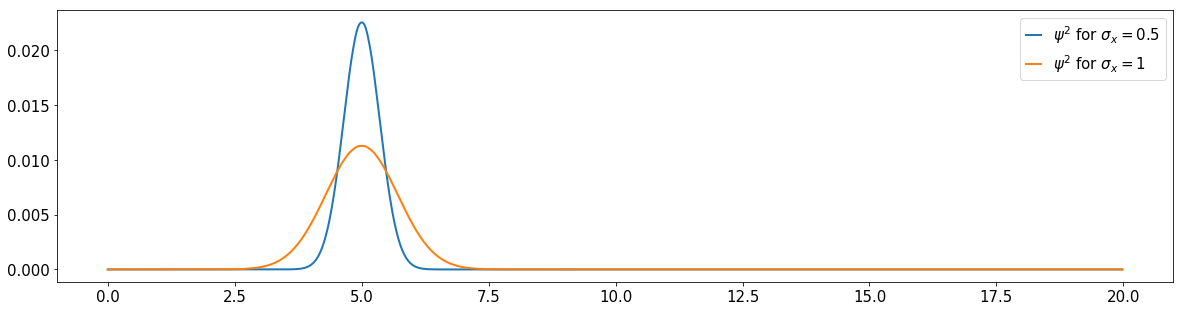

In [4]:
plt.rcParams.update(newparams)
#plotting for different values of sigma_x
sigma_xs=[0.5,1,2]
psi_squared_list=[]

print(timesteps)

for i in range(len(sigma_xs)):
    sigmax=sigma_xs[i]
    
    #finding initial values: 
    psi_i=find_psi_im(x,0,sigmax)
    psi_r=find_psi_re(x,delta_t/2,sigmax)
    
    psi_i_prop,psi_r_prop = propagate_psi(psi_i,psi_r,timesteps,V2)
    
    #calculating the probability density and adding to a list such that it can be plotted later
    psi_squared_list.append(psi_i**2+psi_r**2)

    print(("sigma_x =",sigmax))
    
    plt.subplot(1,2,1)
    plt.title("initial")
    plt.plot(x,psi_i)
    plt.plot(x,psi_r)
    
    plt.subplot(1,2,2)
    plt.title("propagated")
    plt.plot(x,psi_i_prop)
    plt.plot(x,psi_r_prop)
    plt.show()
    
#plotting the probability density psi_squared
plt.plot(x,psi_squared_list[0], label=r'$\psi^2$ for $\sigma_x=0.5$')
plt.plot(x,psi_squared_list[1], label=r'$\psi^2$ for $\sigma_x=1$')
plt.legend()
plt.show()




delta_t= 0.000400003


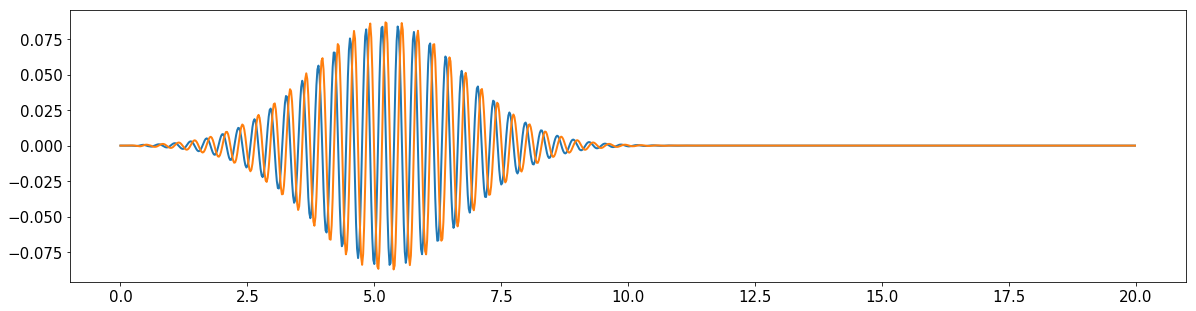

delta_t= 0.000400005


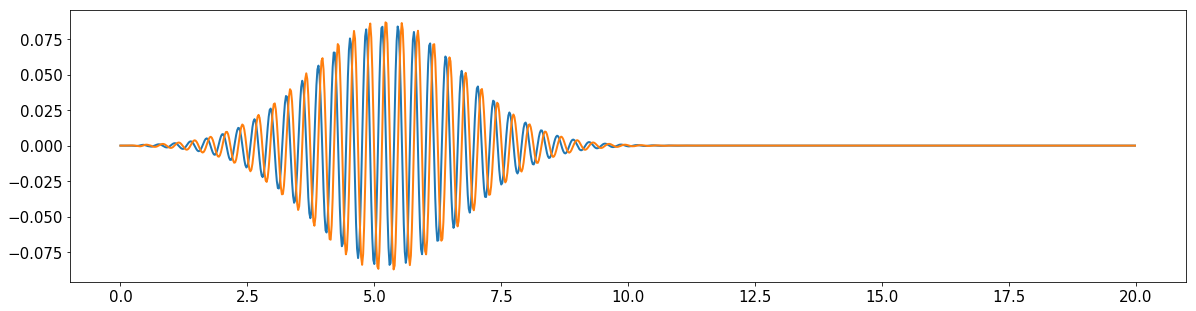

delta_t= 0.00040001


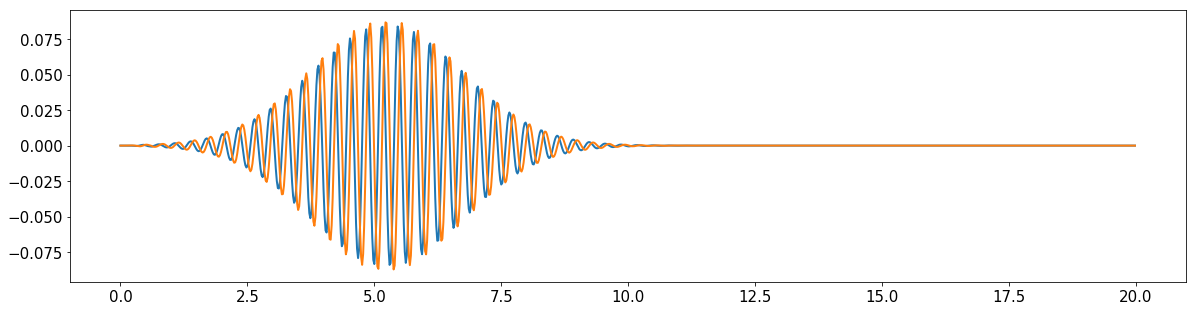

delta_t= 0.000401


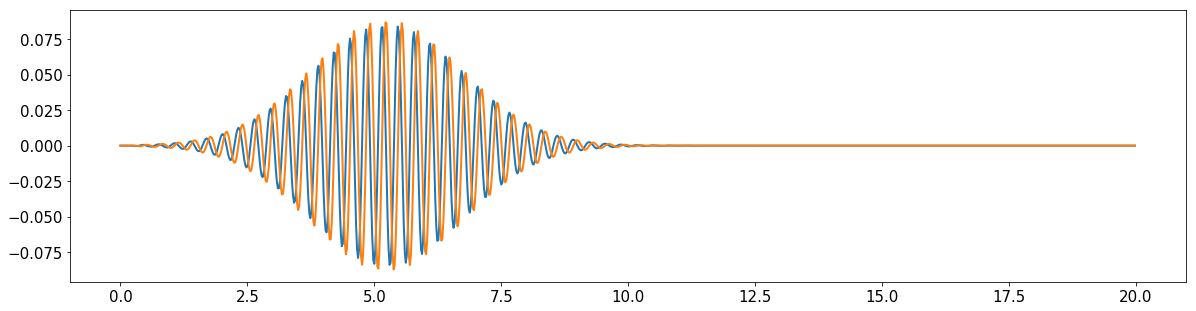

delta_t= 0.000405


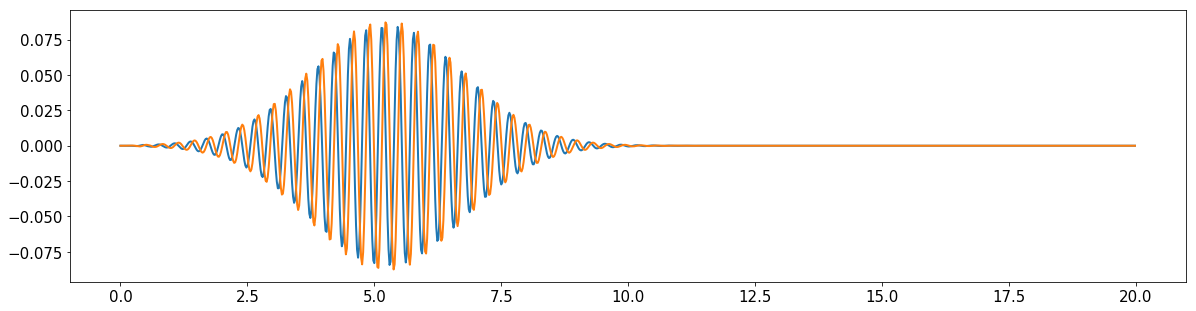

delta_t= 0.00041


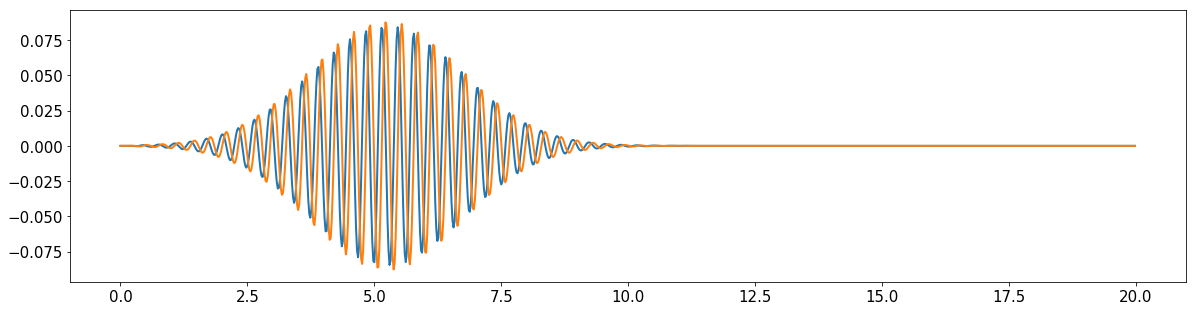

delta_t= 0.00042


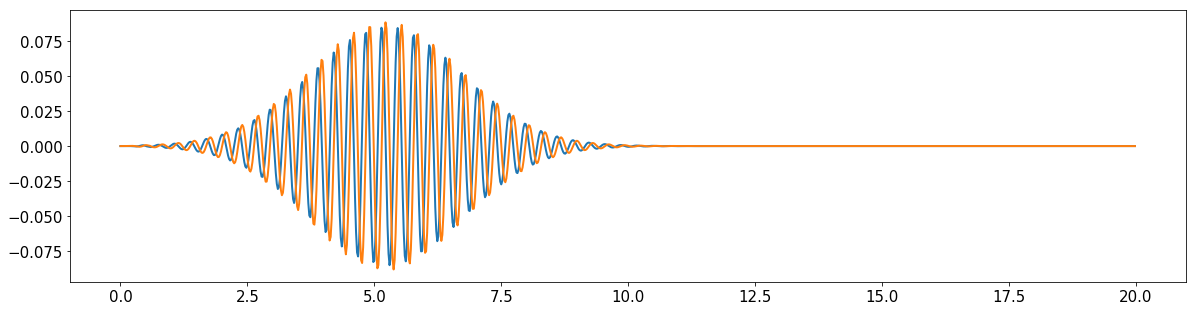

delta_t= 0.0001


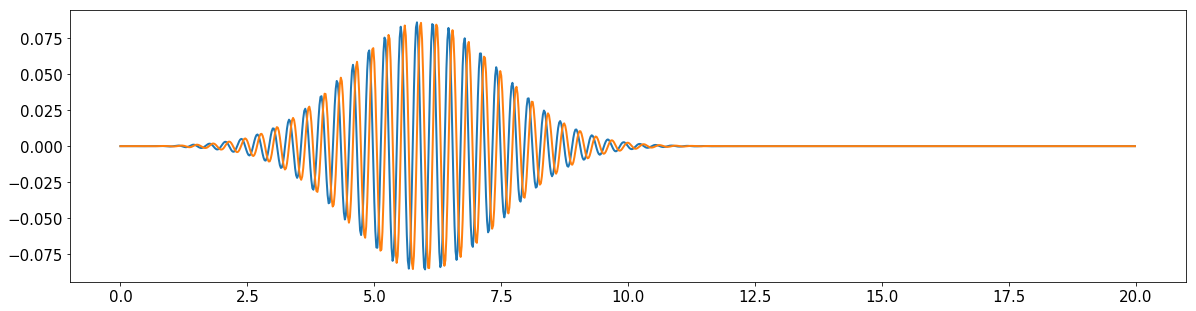

delta_t= 1e-05


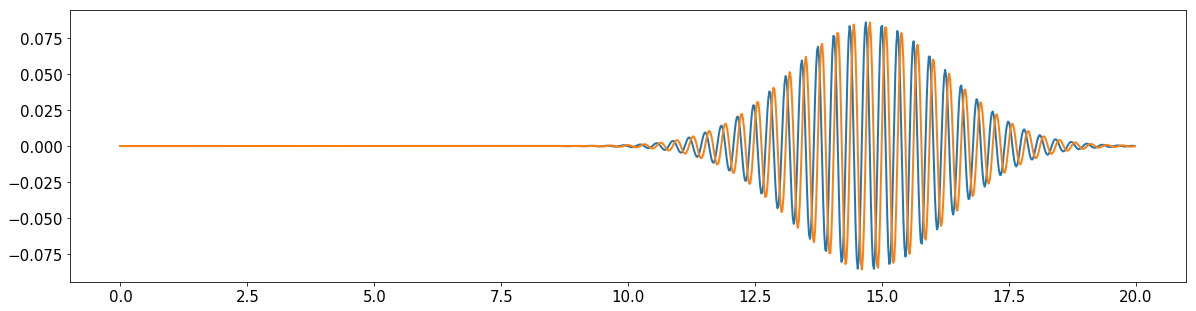

delta_t= 1e-06


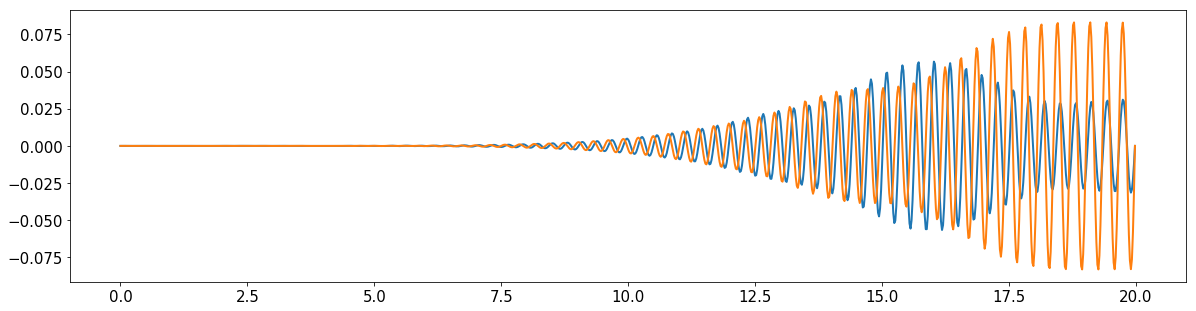

In [5]:
"""MANGLER: test for ulike verdier av delta_t og finn et passende valg"""
list_of_delta_ts=[0.000400003,0.000400005,0.00040001,0.000401,0.000405,0.00041,0.00042,0.0001,0.00001,0.000001]
for i in range(len(list_of_delta_ts)):
    deltat=list_of_delta_ts[i]
    tsteps=int(T/deltat)
    psi_i=find_psi_im(x,0,sigma_x)
    psi_r=find_psi_re(x,deltat/2,sigma_x)
    psi_i,psi_r = propagate_psi(psi_i,psi_r,tsteps,V2)
    print("delta_t=",deltat)
    plt.plot(x,psi_r)
    plt.plot(x,psi_i)
    plt.show()

## problem 3

In [6]:
#DEFINING FUNCTIONS

#Greating a array of potental with a potential barrier
def potential_barrier(V0,l,x):
    return V0*np.heaviside(x-L/2+l/2,0)*np.heaviside(L/2+l/2-x,0)

#transmision probability = the integrated propability density from x= 10 to x= 20
def find_transmission_probability(psi_i,psi_r): 
    psi_absqrd=psi_i**2+psi_r**2
    num_of_points_before_barrier=int(Nx/2)
    Pt=np.sum(psi_absqrd[num_of_points_before_barrier:]) 
    return Pt


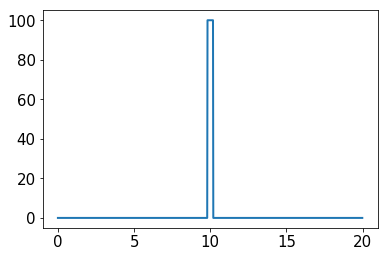

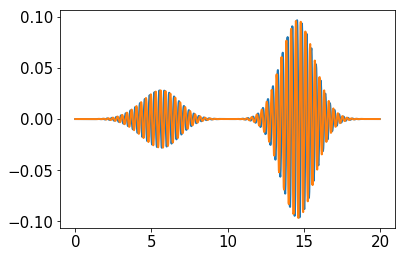

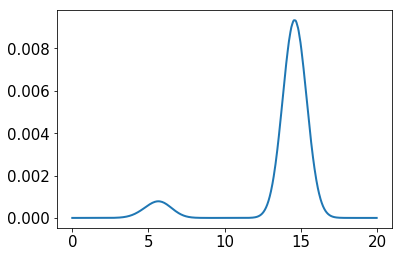

Transmision probability:  0.9134480699705034  Reflection propability:  0.08655191544133367
0.9999999854118371


'MANGLER: \n-regn ut transmisjonssannsynligheten\n'

In [7]:
%matplotlib inline

#Setting the values spesific for this problem 
E=(h_bar*k_0)**2/(2*m)
l=L/50
V_0=E/2
sigma_x=1

#defining the potential as a function of x
"""trenger vi ta inn l her?"""
def V3(x,V_0,l):
    if (L/2-l/2<x) and (L/2+l/2>x):
        return V_0
    else: 
        return 0 

#defing the potensial as an array
V3_arr= np.zeros(len(x)) #making an array of zeros
for i in range(len(x)):
    V3_arr[i]=V3(i*delta_x,V_0,l) #x=i*delta_x 

plt.plot(x,V3_arr)
plt.show()

#initial values for psi_i and psi_r: 
psi_i0=find_psi_im(x,0,sigma_x)
psi_r0=find_psi_re(x,delta_t/2,sigma_x)

psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V3_arr)

#plotting
plt.plot(x,psi_i)
plt.plot(x,psi_r)
plt.show()


    
psi_absqrd=psi_i**2+psi_r**2
plt.plot(x,psi_absqrd)
plt.show()


num_of_points_before_barrier=int(Nx/2)
T=np.sum(psi_absqrd[num_of_points_before_barrier:])   #Probability for transmision
R=np.sum(psi_absqrd[:num_of_points_before_barrier])
print("Transmision probability: ",T, " Reflection propability: ",R)
print(R+T)
"""MANGLER: 
-regn ut transmisjonssannsynligheten
"""

## problem 4

ok 49999
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


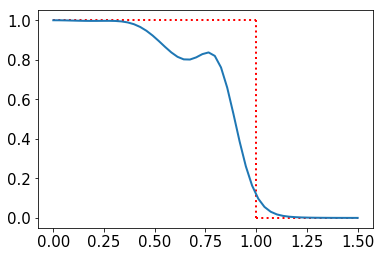

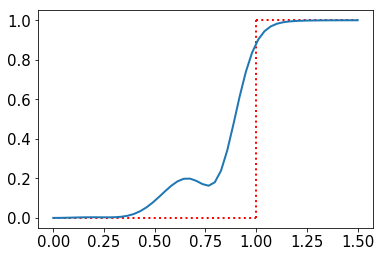

In [8]:
%matplotlib inline
"Making a list of 50 different values of V0"
V0_list=np.linspace(0,(3*E)/2,50)
PtV0  = np.zeros(len(V0_list))  #list to fill in transmision probabilities 

print("ok",timesteps)

for i in range(len(V0_list)):
    print(i)
    V3_arr= np.zeros(len(x)) #making an array of zeros
    for j in range(len(x)):
        V3_arr[j]=V3(j*delta_x,V0_list[i],l) #x=i*delta_x 
        
    """Må kanskje starte med initialverdiene til psi_i og psi_r. Ikke sikker"""
    psi_i0=find_psi_im(x,0,sigma_x)
    psi_r0=find_psi_re(x,delta_t/2,sigma_x)
        
    psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V3_arr)
    #plt.plot(x,psi_i)
    #plt.show()
    
    PtV0[i]=find_transmission_probability(psi_i,psi_r)
    

#plotting transmission probability as a function of potenial barrier height
plt.plot(V0_list/E, PtV0)
plt.hlines(1,0,1,linestyles="dotted",color="red")
plt.vlines(1,0,1,linestyles="dotted",color="red")
plt.hlines(0,1,1.5,linestyles="dotted",color="red")
plt.show()



PrV0=1-PtV0
plt.plot(V0_list/E, PrV0)
plt.hlines(0,0,1,linestyles="dotted",color="red")
plt.vlines(1,0,1,linestyles="dotted",color="red")
plt.hlines(1,1,1.5,linestyles="dotted",color="red")
plt.show()


## problem 5

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


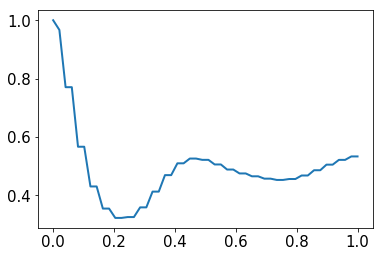

In [9]:
%matplotlib inline
"""Tror vi må ha større Nx for å få stor nok oppløsning"""
#Nx=2000  
#delta_x= L/(Nx)   
"Making a list of 50 different values of L"
L_list=np.linspace(0,L/20,50)
PtL=np.zeros(len(L_list))
V05 = 9/10*E #potential barrier height for problem 5 





for i in range(len(L_list)):
    print(i)
    psi_i0=find_psi_im(x,0,sigma_x)
    psi_r0=find_psi_re(x,delta_t/2,sigma_x)
    V5= potential_barrier(V05,L_list[i],x)
    
    psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V5)
    
    Pt= find_transmission_probability(psi_i,psi_r)
    PtL[i]=Pt    
    
    
plt.plot(L_list,PtL)
plt.show()

## Kristine prøver å lage animasjon


In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

sigma_x=2 #??
h_bar=1
m=1
k_0=20
l=20
t_0=0
xs=5 #bare satte 5 fordi vi skal ha den verdien etterhvert
Nx= 1000
E=(h_bar*k_0)**2/(2*m)
V_0=E/2
V=np.zeros(len(x)) 

def V3(x,V_0,l):
    if (L/2-l/2<x) and (L/2+l/2>x):
        return V_0
    else: 
        return 0 

V3_arr= np.zeros(len(x)) #making an array of zeros
for i in range(len(x)):
    V3_arr[i]=V3(i*delta_x,V_0,l) #x=i*delta_x 

#finding E and omega based on forumula in text
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar


#Function to calculate imaginary part of psi
def find_psi_im(x,t):
    psi_i=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_i[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.sin(k_0*x[1:-1]-omega*t)
    psi_i=psi_i/np.linalg.norm(psi_i) #normalizing
    return psi_i

#function to calculate real part of psi 
def find_psi_re(x,t):
    psi_r=np.zeros(len(x))
    #using the formula, but letting the ends be zero:
    psi_r[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.cos(k_0*x[1:-1]-omega*t)
    psi_r=psi_r/np.linalg.norm(psi_r) #normalizing
    return psi_r
    

delta_t=0.00001
delta_x= L/(Nx)    
x=np.arange(0,L,delta_x)

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i0=find_psi_im(x,0,sigma_x)
psi_r0=find_psi_re(x,delta_t/2,sigma_x)

def newPsi_im(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_i=np.zeros(len(psi_i))
    nextPsi_i[1:-1] = psi_i[1:-1] - delta_t *(V[1:-1]/h_bar*psi_r[1:-1] - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    return nextPsi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,delta_t, V):
    nextPsi_r=np.zeros(len(psi_r))
    nextPsi_r[1:-1] = psi_r[1:-1] + delta_t *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    return nextPsi_r

def propagate_psi(psi_i,psi_r,timesteps,V):
    for i in range(timesteps):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,delta_t, V)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,delta_t, V)
    return psi_i, psi_r

for t in range(10):
    psii,psir=propagate_psi(psi_i0,psi_r0,10,V)
    #plt.plot(x,psii)
    #plt.show()

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, 20))
ax.set_ylim((-0.15, 0.15))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
print("ok")

psi_i=psi_i0
psi_r=psi_r0

# animation function. This is called sequentially
def animate(i): #i endres hver gang... altså må i=antall timesteps i=framenumber.
    t=i
    psi_i,psi_r = propagate_psi(psi_i,psi_r,1000,V3_arr)
    line.set_data(x, psi_i)
    #print("yyo")
    return (line,)

def animatetest(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

animtest = animation.FuncAnimation(fig, animatetest, init_func=init, frames=100000, interval=20, blit=True)

# call the animator. blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate, init_func=init,frames=10000, interval=20, blit=True)

rc('animation', html='html5')


TypeError: find_psi_im() takes 2 positional arguments but 3 were given

In [ ]:
%matplotlib notebook
#sigrid tester sykt chill animasjon: 

Nx=1000 
#making a array of x-values from 0 to L
x=np.arange(0,L,delta_x)

l=L/50/20* 40
V_0=E/2

def V3(x,V_0,l):
    if (L/2-l/2<x) and (L/2+l/2>x):
        return V_0
    else: 
        return 0 

#defing the potensial as an array
V3_arr= np.zeros(len(x)) #making an array of zeros
for i in range(len(x)):
    V3_arr[i]=V3(i*delta_x,V_0,l) #x=i*delta_x 

V_anitest=potential_barrier(V_0,l,x)


#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i=find_psi_im(x,0)
psi_r=find_psi_re(x,delta_t/2)

psi_i_list=np.zeros((200,len(x)))

for i in range(200):
    psi_i,psi_r=propagate_psi(psi_i,psi_r,300,V_anitest)
    psi_i_list[i]=psi_i
    
#plt.plot(x,psi_i_list[50])
#plt.show()


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(-0.1,0.1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    y = psi_i_list[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=200, interval=20, blit=True)